In [2]:
# Importing required libraries
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

from modeling.config import EXPERIMENT_NAME
TRACKING_URI = open("../.mlflow_uri").read().strip()

In [3]:
imb = pd.read_csv("../data/imbalance_1h.csv")

In [4]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

imb_2019 = pd.read_csv("../data/imbalance_1h_2019.csv", index_col=0, parse_dates=['timestamp'], date_parser=dateparse)
imb_2020 = pd.read_csv("../data/imbalance_1h_2020.csv", index_col=0, parse_dates=['timestamp'], date_parser=dateparse)

In [5]:
imb_2019.head()

,imbalance_price
timestamp,
2019-01-01 00:00:00,-329.6045
2019-01-01 01:00:00,-283.8000
2019-01-01 02:00:00,-334.7170
2019-01-01 03:00:00,117.6665
2019-01-01 04:00:00,-323.3150


In [6]:
imb_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20951 entries, 2019-01-01 00:00:00 to 2021-05-22 22:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imbalance_price  20951 non-null  float64
dtypes: float64(1)
memory usage: 327.4 KB


In [7]:
#imb = imb.set_index('datetime')

In [8]:
#imb.drop(['2', 'weekday', 'date'], axis=1, inplace=True)

In [9]:
def train_test_split(df):
    n = int(len(df)*0.7)
    train, test = df.iloc[:n], df.iloc[n:]

    return train,test

In [10]:
train_2019, test_2019 = train_test_split(imb_2019)
train_2020, test_2020 = train_test_split(imb_2020)

In [11]:
print(train_2019.shape, test_2019.shape)
print(train_2020.shape, test_2020.shape)

(14665, 1) (6286, 1)
(8533, 1) (3658, 1)


In [12]:
train_2019.head()

,imbalance_price
timestamp,
2019-01-01 00:00:00,-329.6045
2019-01-01 01:00:00,-283.8000
2019-01-01 02:00:00,-334.7170
2019-01-01 03:00:00,117.6665
2019-01-01 04:00:00,-323.3150


<Figure size 1008x1008 with 0 Axes>

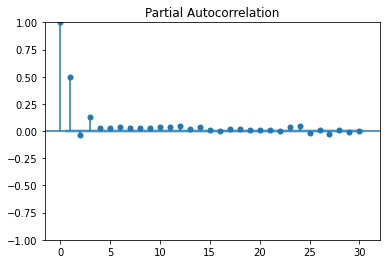

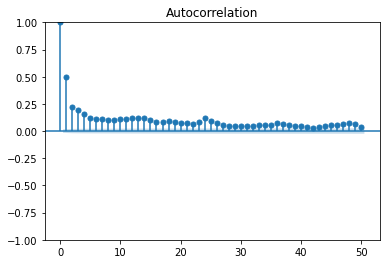

In [13]:
plt.figure(figsize=(14, 14))
pacf = plot_pacf(train_2019, lags=30, alpha=0.05)
acf = plot_acf(train_2019, lags=50, alpha=0.05)

<Figure size 1008x576 with 0 Axes>

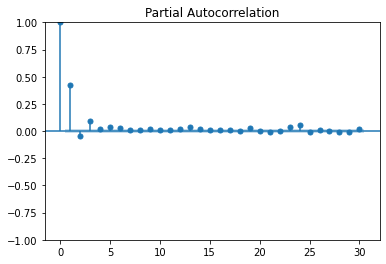

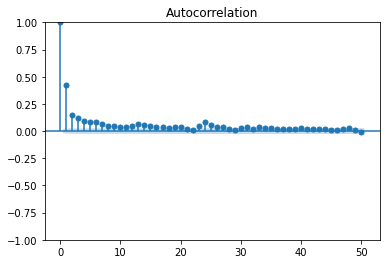

In [14]:
plt.figure(figsize=(14, 8))
pacf = plot_pacf(train_2020, lags=30, alpha=0.05)
acf = plot_acf(train_2020, lags=50, alpha=0.05)

Conclusion : AR (3), MA? (10 or 40)

In [15]:
# Partial Autocorrelation Plot
#plt.figure(figsize=(14, 8))
#pacf = plot_pacf(train, lags=30, alpha=0.05)

Conclusion: AR(3)

In [16]:
# Autocorrelation Plot
#plt.figure(figsize=(14, 8))
#pacf = plot_acf(train, lags=30)

Conclusion: MA between 3 and 10

In [17]:
# setting the MLFlow connection and experiment
mlflow.set_tracking_uri(TRACKING_URI)
mlflow.set_experiment(EXPERIMENT_NAME)
mlflow.start_run()
run = mlflow.active_run()

In [18]:
p_range = range(1,6)
d_range = [1,2]
q_range = [9,10,11,29,30,31]

In [19]:
def best_aic(df, p_range, d_range, q_range):
    aic = []
    for p in p_range:
        for d in d_range:
            for q in q_range:
                order = (p,d,q)
                model = ARIMA(df, order=order)
                model_fit = model.fit()
                aic.append([order, model_fit.aic])
                print(order, model_fit.aic)
    return aic

        

In [20]:
aic_stored = [ (1, 1, 9) 218438.0776477024,
(1, 1, 10) 218438.01246079954,
(1, 1, 11) 218440.0511899708,
(1, 1, 29) 218340.04531203417,
(1, 1, 30) 218338.54849014725,
(1, 1, 31) 218340.52428676168,
(1, 2, 9) 218564.85978435766,
(1, 2, 10) 218549.11981467105,
(1, 2, 11) 218444.7523995524,
(1, 2, 29) 218378.39439223066,
(1, 2, 30) 218372.16868848068,
(1, 2, 31) 218375.07940818206,
(2, 1, 9) 218441.75412751187,
(2, 1, 10) 218432.7815369026,
(2, 1, 11) 218442.93800884116,
(2, 1, 29) 218345.72706959496,
(2, 1, 30) 218338.1428312349,
(2, 1, 31) 218337.6654606091,
(2, 2, 9) 218559.46220384608,
(2, 2, 10) 218544.80879750013,
(2, 2, 11) 218535.00113799973,
(2, 2, 29) 218387.8264022952
(3, 1, 31) 218347.48071973433,]

SyntaxError: invalid syntax (1452040599.py, line 1)

In [22]:
aic = best_aic(train_2019, [4], [1], [31])

In [ ]:
# or parameters of the model (fit_intercept for Linear Regression model)
mlflow_params = {
      "p": fitted_model.params,
      "d": ,
      "q": ,
  }

In [ ]:
# logging params to mlflow
mlflow.log_params(params)
# setting tags
mlflow.set_tag("model", "ARIMA")
mlflow.set_tag("features", "imbalance price")
# logging metrics
mlflow.log_metric("test-" + "RMSE", rmse)
mlflow.log_metric("test-" + "R2", rsquared)
# end run
mlflow.end_run()

In [ ]:
plt.figure(figsize=(14,6))
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals, label='residuals')
#plt.plot(train_2019, label= 'original', alpha=0.5)
plt.legend()